***Tarea 07:*** Ecuaciones Diferenciales, Oscilaciones acopladas

*Nataly Lucía Murillo Mosquera*

**CC** *1003970969*

In [26]:
# Librerías

import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pylab as plt

In [27]:
# Constantes elásticas:
k1 = 1
k2 = 1
k3 = 1

# Masas:
m1 = 1
m2 = 1

In [28]:
# Función que halla autovalores:

def f(k1, k2, k3):
  B = np.matrix([[k1 + k2, -k2],      
                 [-k2, k2 + k3]])
  
  M_val, M_vec = np.linalg.eig(B)  
  
  return M_val, M_vec, B   # Se retornan tres matrices: La de autovalores, la de autovectores y la matriz B

# Función que construye la matriz diagonal B

def B_diag( k1, k2, k3 ):
  M_val = f(k1, k2, k3)[0] # M_val es la matriz de autovalores
  M_vec = f(k1, k2, k3)[1] # M_vec es la matriz de autovectores
  B = f(k1, k2, k3)[2] # B es la matriz de constantes elásticas

  B_diag = M_vec@B@M_vec.I  

  return B_diag

In [41]:
# Frecuencias de oscilación
M_val = f(k1, k2, k3)[0]

w1 = M_val[0]/m1
w2 = M_val[1]/m2
params = w1, w2

In [30]:
def func(η, t, params):
  
  # Descomposición de la primera EDO de segundo orden en dos de primer orden
  dη1dt =  η[1]
  dΦ1dt =  -params[0] * η[0]

  # Descomposición de la segunda EDO de segundo orden en dos de primer orden
  dη2dt =  η[3]
  dΦ2dt = -params[1] * η[2] 
  
  return [dη1dt, dΦ1dt, dη2dt, dΦ2dt]

In [31]:
# Condiciones iniciales:

η_0 = 1 # Primera posicion inicial
η_1 = 2 # Primera velocidad inicial
η_2 = 3 # Segunda posicion inicial 
η_3 = 4 # Segunda velocidad inicial

η_ini = np.array([η_0, η_1, η_2, η_3]) # Array de condiciones iniciales

t = np.linspace(-6, 6, 100000)  # Límites de integracion

η = odeint(func, η_ini, t, args = (params,) )  # Solución de las EDO

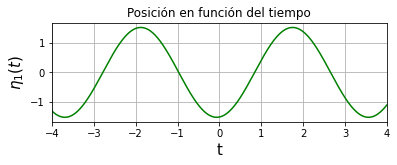

In [35]:
# Gráficas de n1(t) y su derivada:

η0 = η[:,0] #Posicion en el tiempo
η1 = η[:,1] #Velocidad en el tiempo

plt.subplot(211)
plt.plot(t, η0,'g') 
plt.title('Posición en función del tiempo')
plt.xlabel("t",size=15)   
plt.ylabel("$η_1(t)$", size = 15)
plt.xlim(-4,4)
plt.grid()

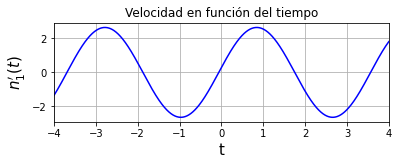

In [36]:
η0 = η[:,0] #Posicion en el tiempo
η1 = η[:,1] #Velocidad en el tiempo

plt.subplot(212)
plt.plot(t, η1,'b')
plt.title('Velocidad en función del tiempo')
plt.xlabel("t",size=15)  
plt.ylabel("$n_1'(t)$", size = 15) 
plt.xlim(-4,4)
plt.grid()

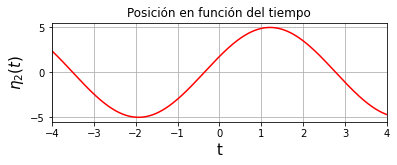

In [37]:
# Gráficas de n2(t) y su derivada:

η2 = η[:,2] #Posicion en el tiempo
η3 = η[:,3] #Velocidad en el tiempo

plt.subplot(211)
plt.plot(t, η2,'r')
plt.title('Posición en función del tiempo')
plt.xlabel("t",size=15) 
plt.ylabel("$η_2(t)$", size = 15)
plt.xlim(-4,4)
plt.grid()

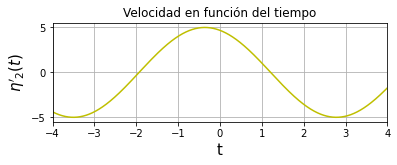

In [39]:
plt.subplot(212)
plt.plot(t,η3,'y')
plt.title('Velocidad en función del tiempo')
plt.xlabel("t",size=15)
plt.ylabel("$η'_2(t)$", size = 15)
plt.xlim(-4,4)
plt.grid()

In [45]:
#Funciones analíticas para η1 y η2:

f_η1 = lambda t: η_0*np.cos(w1*t) + (η_1/w1)*np.sin(w1*t)
f_η2 = lambda t: η_2*np.cos(w2*t) + (η_3/w2)*np.sin(w2*t)

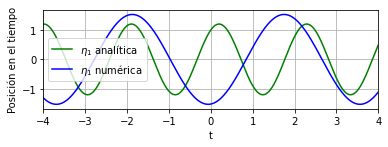

In [54]:
#Gráficas de η analítica vs numérica:

plt.subplot(211)
plt.plot(t,f_η1(t),'g', label='$η_1$ analítica') # η1 analítica
plt.plot(t,η0,'b', label='$η_1$ numérica')  # η1 numérica
plt.xlabel('t',size=10) 
plt.ylabel('Posición en el tiempo',size=10)  
plt.xlim(-4,4)
plt.legend() 
plt.grid()

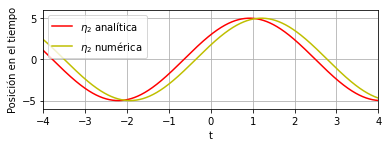

In [53]:
plt.subplot(212)
plt.plot(t,f_η2(t),'r', label='$η_2$ analítica') # η2 analítica
plt.plot(t,η2,'y', label='$η_2$ numérica')  # η2 numérica
plt.xlabel('t',size=10)
plt.ylabel('Posición en el tiempo',size=10)
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.legend()
plt.grid()